In [103]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Exercise 10.3 Brownian Motion
Brownian Motion is the motion of a particle in a gas where random collisions with gas particles determine the motion of the particle. It's best modeled with a random number generator that determines the new direction

In [129]:

#################################################################
# This program simulates Brownian motion in the presence of walls
# Note that the physical behaviour would be to stick to walls,
# which is the purpose of Q1a.
# Author: Nico Grisouard, University of Toronto
# Date: 14 November 2018
#################################################################
def nextmove(x, y):
    """ randomly choose a direction
    1 = up, 2 = down, 3 = left, 4 = right"""
    direction =  np.random.randint(1,5)
    if direction == 1:  # move up
        y += 1
    elif direction == 2:  # move down
        y -= 1
    elif direction == 3:  # move right
        x += 1
    elif direction == 4:  # move left
        x -= 1
    else:
        print("error: direction isn't 1-4")
    if x == 100 :
        x -= 1
    elif y == 100 :
        y -= 1
    elif x == 0:
        x += 1
    elif y == 0:
        y += 1
    return x, y

# %% main program starts here ------------------------------------------------|
# YOU NEED TO FINISH IT!
plt.ion()

Lp = 101  # size of domain
Nt = 5000  # number of time steps
# arrays to record the trajectory of the particle
x_position = np.empty(Nt)
y_position = np.empty(Nt)
# COMPLETE

centre_point = (Lp-1)//2  # middle point of domain
x_position[0] = centre_point
y_position[0] = centre_point
for i in range(Nt-1):
    x_position[i+1],y_position[i+1] = nextmove(x_position[i],y_position[i])
    #print(x_position[i],y_position[i])
    # AND OFF YOU GO!


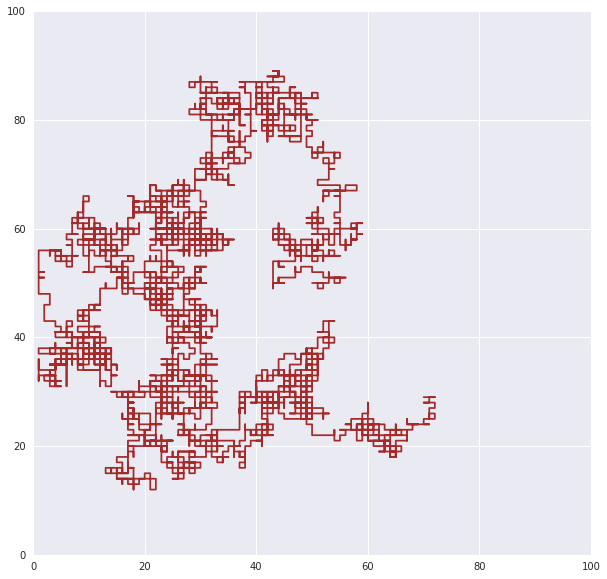

In [130]:
plt.figure(figsize = (10,10))    
plt.plot(x_position, y_position, c = 'brown')
plt.ylim(0,100)
plt.xlim(0,100)
plt.show()

### Exercise 10.13
Diffusion Limited aggregation is the clustering of particles that were undergoing Brownian Motion until they connected to one another.  First the code runs for 100 test particles, and then it runs until it reaches the centre

In [106]:
def nextmove(x, y):
    """ randomly choose a direction
    1 = up, 2 = down, 3 = left, 4 = right"""
    direction =  np.random.randint(1,5)
    if direction == 1:  # move up
        y += 1
    elif direction == 2:  # move down
        y -= 1
    elif direction == 3:  # move right
        x += 1
    elif direction == 4:  # move left
        x -= 1
    else:
        print("error: direction isn't 1-4")
    return x, y


In [107]:
x_particle_list = np.empty(100)
y_particle_list = np.empty(100)
Lp = 101  # size of domain
# arrays to record the trajectory of the particle
centre_point = (Lp-1)//2  # middle point of domain
x_position = centre_point
y_position = centre_point
i = 0
j = 0

In [108]:

while i < 100:   # number of particle count
    new_particle = False
    x_fill,y_fill = nextmove(x_position, y_position)
    if x_fill == Lp-1 or y_fill == Lp-1 or x_fill == 0 or y_fill == 0:
       # test for hitting a wall
        new_particle = True  
    for j in range(i):
        if x_fill == x_particle_list[j] and y_fill == y_particle_list[j]:
            #testing if hit another particle
            new_particle = True
    if new_particle == True:
       # print('generated new particle')
        # generate a new particle
        x_particle_list[i] = x_position
        y_particle_list[i] = y_position
        x_position = centre_point
        y_position = centre_point
        #print(len(x_position))
        i+= 1
    else:  
        x_position =  x_fill
        y_position =  y_fill
    # AND OFF YOU GO!

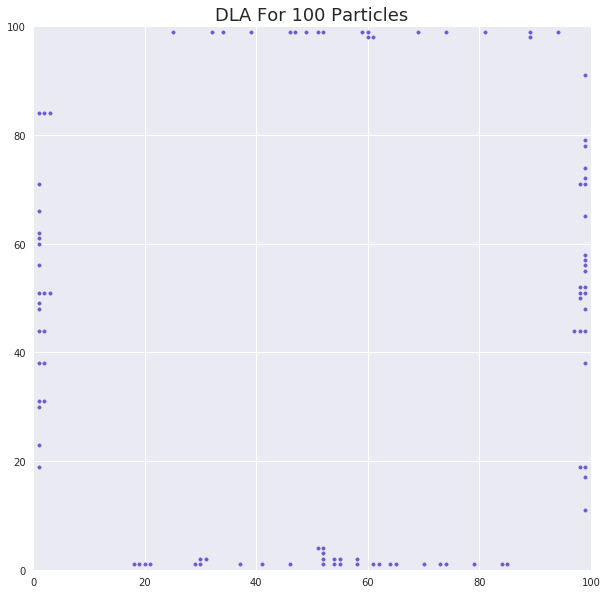

In [109]:
plt.figure(figsize = (10,10))  
plt.ylim(0,Lp-1)
plt.xlim(0,Lp-1)
plt.title('DLA For 100 Particles', fontsize = '18')
for j in range(100):
    plt.scatter(x_particle_list[j],y_particle_list[j],marker = ".", c = 'slateblue')
plt.show()

In [119]:
x_particle_list =[]
y_particle_list =[]
Lp = 151  # size of domain
# arrays to record the trajectory of the particle
centre_point = (Lp-1)//2  # middle point of domain
x_position = centre_point
y_position = centre_point
centre_full = False
new_particle = False

In [120]:
new_particle = False
while centre_full == False:  # testing if centre point is full
    new_particle = False
    x_fill,y_fill = nextmove(x_position,y_position) # generating direction
    if x_fill == Lp-1 or y_fill == Lp-1 or x_fill == 0 or y_fill == 0:
    # Here you test if particle hits a wall
        new_particle = True  
    for j in range(len(x_particle_list)):
        if x_fill == x_particle_list[j] and y_fill == y_particle_list[j]:
        # here you test if it hits another particle
            new_particle = True
            if x_position == centre_point and y_position == centre_point:
                centre_full = True
            # finishing the calculation if hit centre
    if new_particle == True:
        # generate a new particle
        x_particle_list.append(x_position)
        y_particle_list.append(y_position)
        x_position = centre_point
        y_position = centre_point
        #print(len(x_position))
    else:  
        # continue moving
        x_position = x_fill
        y_position = y_fill
    # AND OFF YOU GO!

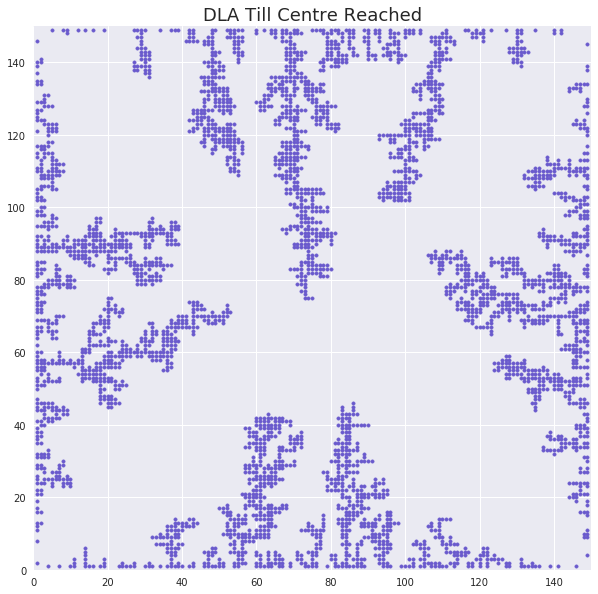

In [124]:
plt.figure(figsize = (10,10))  
plt.ylim(0,Lp-1)
plt.xlim(0,Lp-1)
plt.title('DLA Till Centre Reached', fontsize = '18')
for j in range(len(x_particle_list)):
    plt.scatter(x_particle_list[j],y_particle_list[j],marker = ".",  c = 'slateblue')
plt.show()